<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Rede_neural_arquitetura_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importando as bibliotecas de interesse

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.metrics import MeanRelativeError
from keras.initializers import Ones, glorot_uniform, he_normal, Zeros

In [10]:
#Carregando o dataset e separando em teste e treino
df = pd.read_csv('data_cov (1).csv')
y = df['cov']
x = df.drop('cov', axis = 1)

x_treino, x_teste = x[0:86], x[86:]
y_treino, y_teste = y[0:86], y[86:]

x_treino, x_teste, y_treino, y_teste, = train_test_split(x , y, test_size = 10, random_state = None)
#Colocando em ordem crescente e normalizando

x_treino = x_treino.values
x_teste = x_teste.values
y_treino = y_treino.values
y_teste = y_teste.values


scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [11]:
def modelo_RNA(x, activation, nos, camadas_ocultas):
  modelo = Sequential()
  modelo.add(tf.keras.layers.Input(shape=(x.shape[1],)))
  #modelo.add(keras.layers.Dense(nos, activation='relu', input_shape=x.shape))
  for i in range(camadas_ocultas):
    modelo.add(keras.layers.Dense(nos, activation=activation, kernel_initializer=Zeros()))
    modelo.add(keras.layers.Dropout(0.2))
  modelo.add(keras.layers.Dense(1, activation= 'linear'))
  modelo.summary()

  return modelo

def treino_modelo(modelo, optimizer, loss, metrics, x_treino, y_treino, x_teste, y_teste, itr):
  modelo.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  resultado = modelo.fit(x_treino, y_treino, epochs=itr, batch_size=5, validation_data=(x_teste, y_teste))

  loss = resultado.history['loss'][349]; val_loss = resultado.history['val_loss'][349]
  mae = resultado.history['mae'][349]; val_mae = resultado.history['val_mae'][349]

  return loss, val_loss, mae, val_mae, resultado, modelo

def erro_relativo(y_pred, y_true):
  return np.mean(np.abs((y_true - y_pred) / y_true))

In [12]:
#Analisando os valores dos erros
loss = []
val_loss = []
mae = []
val_mae = []
erro_relativo_valor = []
a = []
for i in range (2, 17):
  otimizador = tf.keras.optimizers.Adam(learning_rate=0.01)
  nos = 10
  modelo = modelo_RNA(x_treino, 'linear', nos, i)
  aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado, modelo = treino_modelo(modelo, 'adam', 'mse', ['mae'], x_treino, y_treino, x_teste, y_teste, 350)

  loss.append(aux_loss)
  val_loss.append(aux_val_loss)
  mae.append(aux_mae)
  val_mae.append(aux_val_mae)

  x_treino1 = pd.DataFrame(x_treino)
  x_treino1.insert(5, 'Cov',y_treino)
  x_treino1 = x_treino1.sort_values(by=4)

  y_treino1 = x_treino1['Cov']
  x_treino1 = x_treino1.drop('Cov', axis = 1)
  y_pred = modelo.predict(x_treino1)
  y_treino1 = y_treino1.values
  y_treino1 = np.reshape(y_treino1, (86,1))
  aux_erro_relativo = erro_relativo(y_pred, y_treino1)

  erro_relativo_valor.append(aux_erro_relativo)
  a.append(i)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                60        
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/350
18/1

3/3 [==============================] - 0s 6ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                60        
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dropout_17 (Dropout)        (None, 10)                0         
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dropout_18 (Dropout)        (None, 10)                0         
                                                                 
 de

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 150/350
18/18 [==============================] - 0s 7ms/step - loss: 0.0044 - mae: 0.0251 - val_loss: 6.3142e-04 - val_mae: 0.0193
Epoch 151/350
18/18 [==============================] - 0s 6ms/step - loss: 0.0044 - mae: 0.0253 - val_loss: 7.1763e-04 - val_mae: 0.0221
Epoch 152/350
18/18 [==============================] - 0s 7ms/step - loss: 0.0044 - mae: 0.0248 - val_loss: 6.4804e-04 - val_mae: 0.0199
Epoch 153/350
18/18 [==============================] - 0s 7ms/step - loss: 0.0043 - mae: 0.0245 - val_loss: 6.5274e-04 - val_mae: 0.0200
Epoch 154/350
18/18 [==============================] - 0s 7ms/step - loss: 0.0043 - mae: 0.0249 - val_loss: 7.0038e-04 - val_mae: 0.0215
Epoch 155/350
18/18 [==============================] - 0s 6ms/step - loss: 0.0044 - mae: 0.0251 - val_loss: 7.3799e-04 - val_mae: 0.0227
Epoch 156/350
18/18 [==============================] - 0s 7ms/step - loss: 0.0044 - mae: 0.0260 - val_loss: 6.6557e-04 

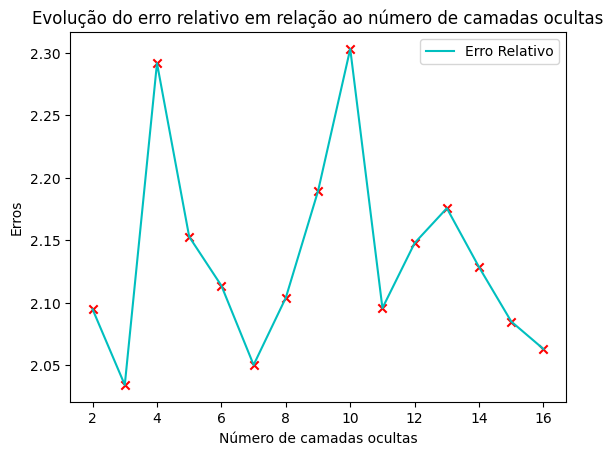

<function erro_relativo at 0x783cede07760>


In [13]:
#Plotando o gráfico com os erros

plt.plot(a, erro_relativo_valor, c='c')
plt.scatter(a, erro_relativo_valor, marker='x', c='r', label = 'Pontos')
plt.title('Evolução do erro relativo em relação ao número de camadas ocultas')
plt.ylabel('Erros')
plt.xlabel('Número de camadas ocultas')
plt.legend(['Erro Relativo'])
plt.show()
print(erro_relativo)

In [17]:
#Analisando os valores dos erros
loss_n = []
val_loss_n = []
mae_n = []
val_mae_n = []
erro_relativo_n = []

n = []
for i in range (10, 70, 5):
  otimizador = tf.keras.optimizers.Adam(learning_rate=0.01)
  camadas_ocultas = 11
  modelo = modelo_RNA(x_treino, 'linear', i, camadas_ocultas)
  aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado, modelo = treino_modelo(modelo, 'adam', 'mse', ['mae'], x_treino, y_treino, x_teste, y_teste, 350)

  loss.append(aux_loss)
  val_loss.append(aux_val_loss)
  mae.append(aux_mae)
  val_mae.append(aux_val_mae)

  x_treino1 = pd.DataFrame(x_treino)
  x_treino1.insert(5, 'Cov',y_treino)
  x_treino1 = x_treino1.sort_values(by=4)

  y_treino1 = x_treino1['Cov']
  x_treino1 = x_treino1.drop('Cov', axis = 1)
  y_pred = modelo.predict(x_treino1)
  y_treino1 = y_treino1.values
  y_treino1 = np.reshape(y_treino1, (86,1))

  y_pred = modelo.predict(x_treino1)
  aux_erro_relativo = erro_relativo(y_pred, y_treino1)

  erro_relativo_n.append(aux_erro_relativo)
  n.append(i)

A saída de streaming foi truncada nas últimas 5000 linhas.
18/18 [==============================] - 0s 8ms/step - loss: 0.0043 - mae: 0.0251 - val_loss: 8.2079e-04 - val_mae: 0.0250
Epoch 124/350
18/18 [==============================] - 0s 8ms/step - loss: 0.0043 - mae: 0.0269 - val_loss: 7.2492e-04 - val_mae: 0.0223
Epoch 125/350
18/18 [==============================] - 0s 9ms/step - loss: 0.0044 - mae: 0.0245 - val_loss: 6.5535e-04 - val_mae: 0.0201
Epoch 126/350
18/18 [==============================] - 0s 9ms/step - loss: 0.0043 - mae: 0.0238 - val_loss: 6.6323e-04 - val_mae: 0.0204
Epoch 127/350
18/18 [==============================] - 0s 9ms/step - loss: 0.0044 - mae: 0.0227 - val_loss: 6.4609e-04 - val_mae: 0.0198
Epoch 128/350
18/18 [==============================] - 0s 7ms/step - loss: 0.0045 - mae: 0.0299 - val_loss: 7.9784e-04 - val_mae: 0.0244
Epoch 129/350
18/18 [==============================] - 0s 9ms/step - loss: 0.0044 - mae: 0.0251 - val_loss: 5.9274e-04 - val_mae: 0.0

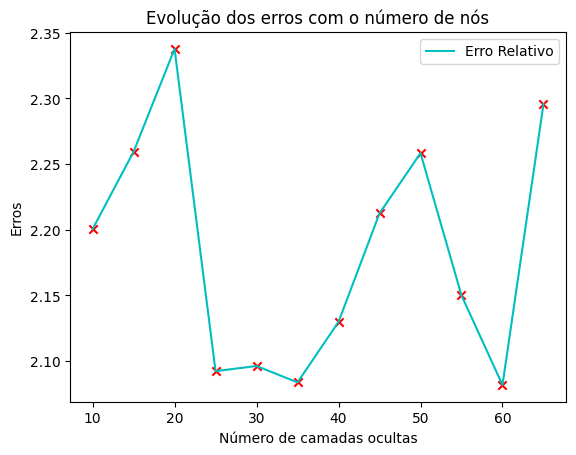

[2.2005255353659554, 2.259396661659933, 2.3377575492913243, 2.0923281573578763, 2.0962569237740687, 2.0837428079757134, 2.12987736539316, 2.2125079631942794, 2.2583837599516214, 2.149994944334438, 2.0818405154555517, 2.2957921789296285]


In [18]:
plt.plot(n, erro_relativo_n, c='c')
plt.scatter(n, erro_relativo_n, marker='x', c='r', label = 'Pontos')
plt.title('Evolução dos erros com o número de nós')
plt.ylabel('Erros')
plt.xlabel('Número de camadas ocultas')
plt.legend(['Erro Relativo'])
plt.show()
print(erro_relativo_n)